In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = [14, 8]

In [ ]:
import os

# Load training results data
data_dir = os.path.join('..', 'runs', 'food_seg_model', 'food_recognition2')
results_path = os.path.join(data_dir, 'results.csv')
data = pd.read_csv(results_path)

# Display first few rows to understand the data

data.head()

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,858.903,1.40046,4.21602,4.49815,1.72608,0.00297,0.25029,0.01401,0.00899,...,0.17280,0.01045,0.00560,1.52093,4.10186,3.93398,2.15377,0.067003,0.000333,0.000333
1,2,1668.240,1.34698,4.03859,3.81626,1.66278,0.71458,0.04490,0.04960,0.03600,...,0.03913,0.04393,0.02554,1.37458,3.85630,3.43402,2.01712,0.033997,0.000660,0.000660
2,3,2472.570,1.30342,3.95046,3.55640,1.62124,0.69568,0.06508,0.08174,0.06063,...,0.05895,0.07276,0.04304,1.34626,3.71577,3.19328,1.96460,0.000984,0.000980,0.000980
3,4,3288.850,1.27362,3.89086,3.39168,1.59405,0.70507,0.08045,0.09592,0.06916,...,0.07364,0.08552,0.04708,1.31555,3.65542,3.04777,1.91618,0.000970,0.000970,0.000970
4,5,4087.300,1.24943,3.83917,3.27467,1.57290,0.69410,0.10478,0.11221,0.08030,...,0.08750,0.10113,0.05697,1.28028,3.59828,2.94473,1.88929,0.000960,0.000960,0.000960


# Training Statistics Visualization

This notebook visualizes the progression of various training metrics across epochs for the food recognition model.

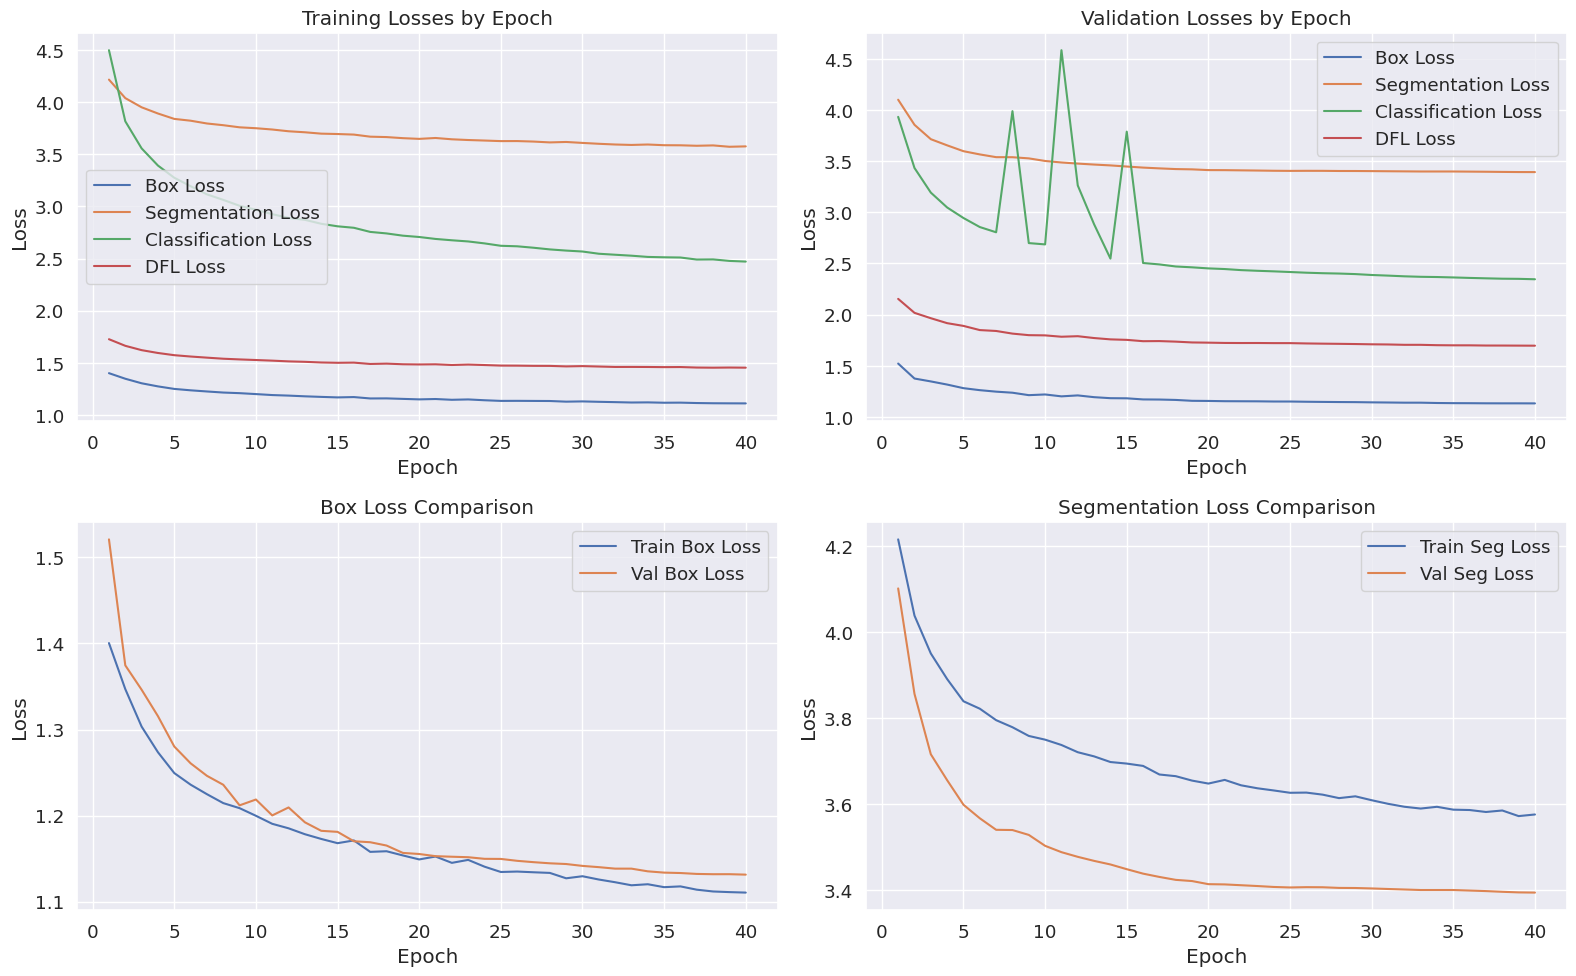

In [3]:
# Plot all losses
plt.figure(figsize=(16, 10))

# Training losses
plt.subplot(2, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Box Loss')
plt.plot(data['epoch'], data['train/seg_loss'], label='Segmentation Loss')
plt.plot(data['epoch'], data['train/cls_loss'], label='Classification Loss')
plt.plot(data['epoch'], data['train/dfl_loss'], label='DFL Loss')
plt.title('Training Losses by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation losses
plt.subplot(2, 2, 2)
plt.plot(data['epoch'], data['val/box_loss'], label='Box Loss')
plt.plot(data['epoch'], data['val/seg_loss'], label='Segmentation Loss')
plt.plot(data['epoch'], data['val/cls_loss'], label='Classification Loss')
plt.plot(data['epoch'], data['val/dfl_loss'], label='DFL Loss')
plt.title('Validation Losses by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Compare train vs val box loss
plt.subplot(2, 2, 3)
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
plt.plot(data['epoch'], data['val/box_loss'], label='Val Box Loss')
plt.title('Box Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Compare train vs val segmentation loss
plt.subplot(2, 2, 4)
plt.plot(data['epoch'], data['train/seg_loss'], label='Train Seg Loss')
plt.plot(data['epoch'], data['val/seg_loss'], label='Val Seg Loss')
plt.title('Segmentation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

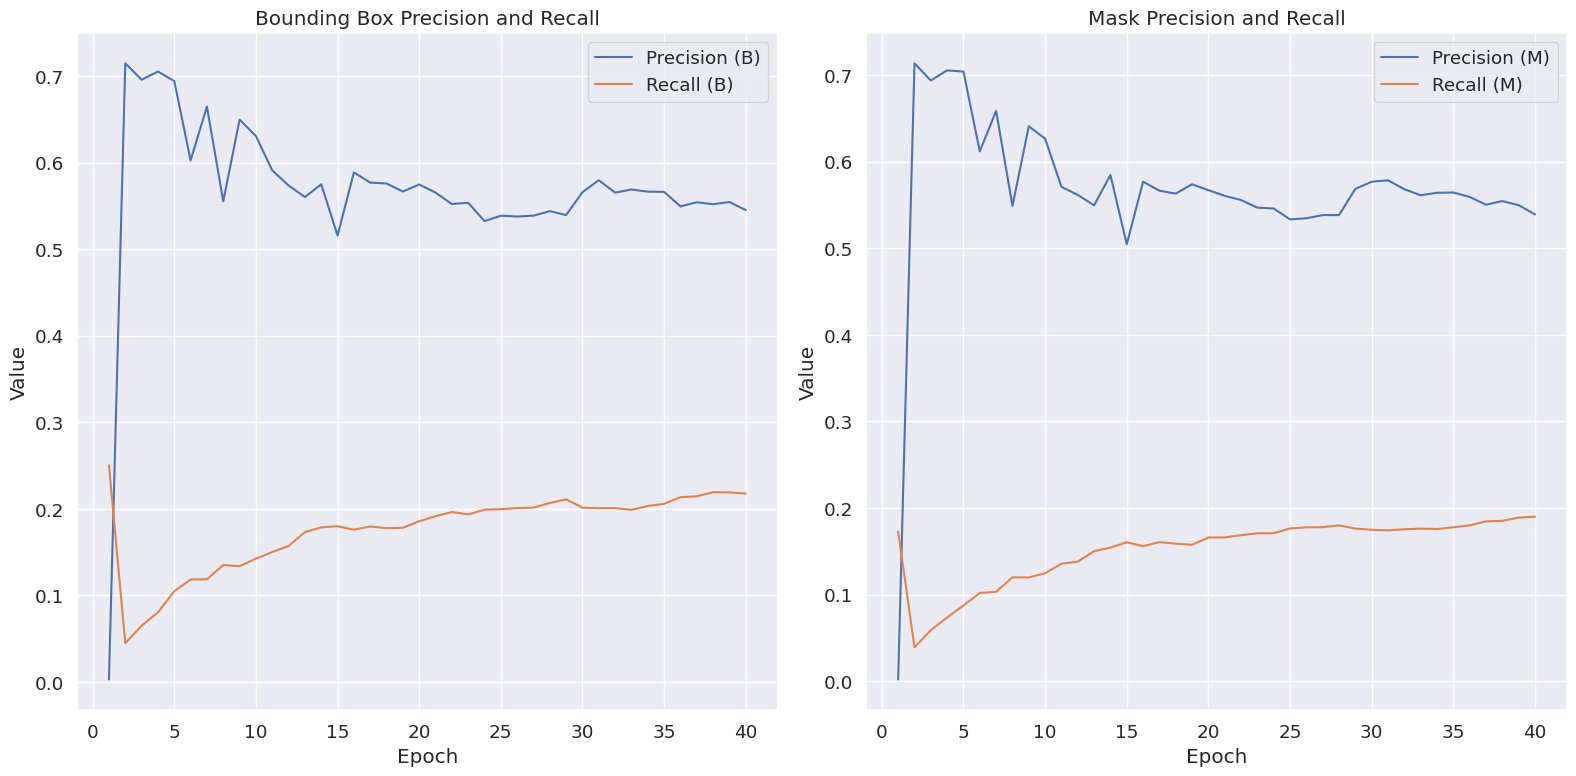

In [4]:
# Plot precision and recall metrics
plt.figure(figsize=(16, 8))

# Bounding box precision/recall
plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision (B)')
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall (B)')
plt.title('Bounding Box Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Mask precision/recall
plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['metrics/precision(M)'], label='Precision (M)')
plt.plot(data['epoch'], data['metrics/recall(M)'], label='Recall (M)')
plt.title('Mask Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

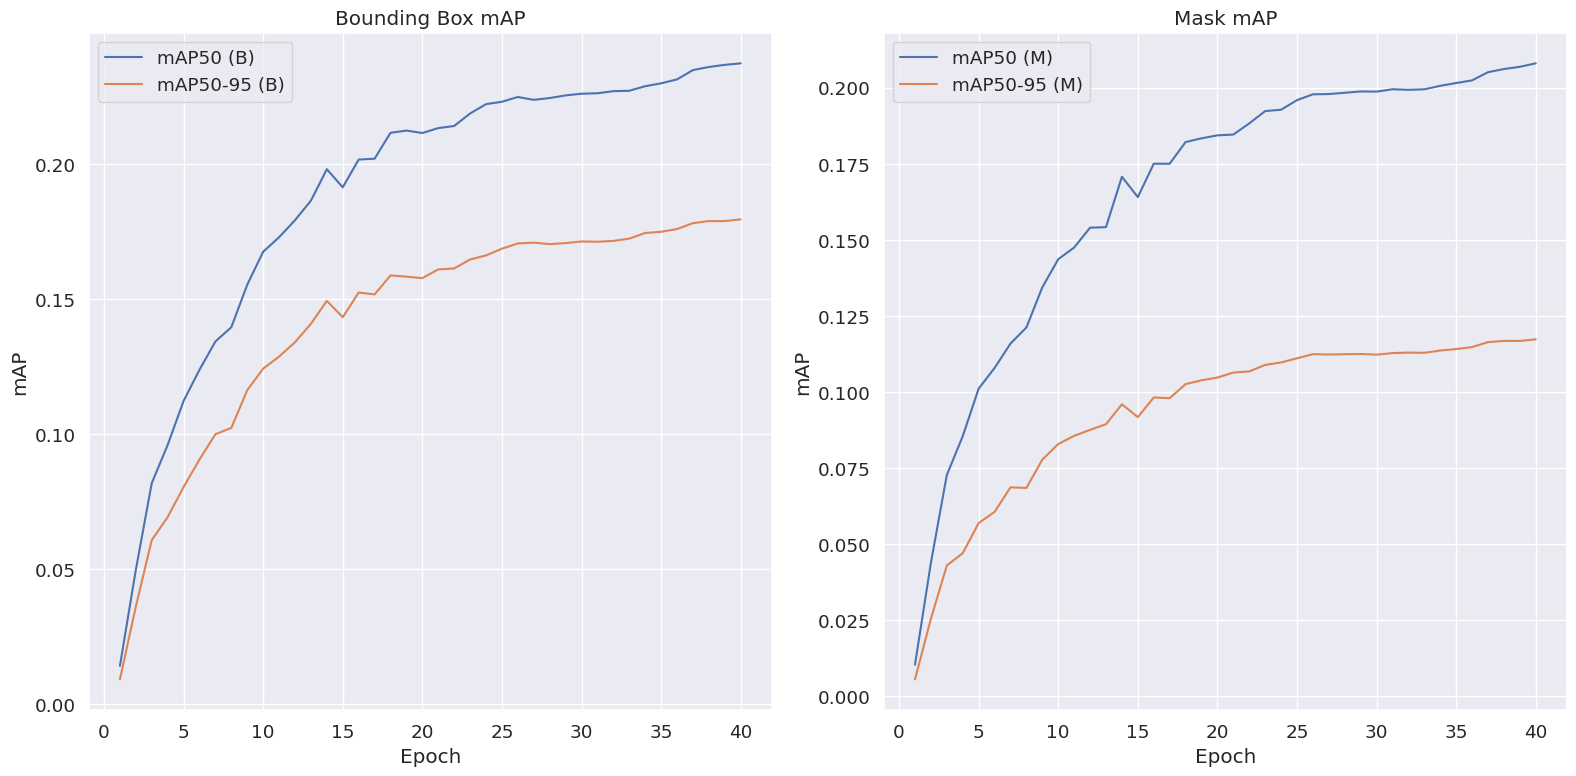

In [5]:
# Plot mAP metrics
plt.figure(figsize=(16, 8))

# mAP for bounding boxes
plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50 (B)')
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
plt.title('Bounding Box mAP')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)

# mAP for masks
plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['metrics/mAP50(M)'], label='mAP50 (M)')
plt.plot(data['epoch'], data['metrics/mAP50-95(M)'], label='mAP50-95 (M)')
plt.title('Mask mAP')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

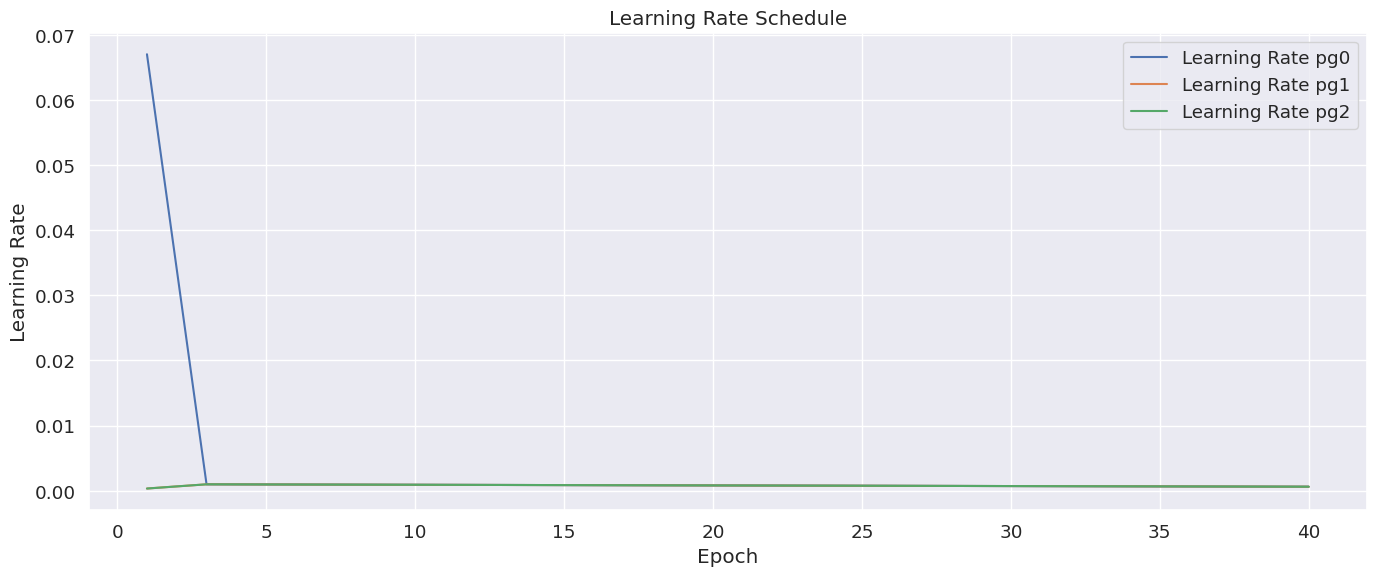

In [6]:
# Plot learning rates
plt.figure(figsize=(14, 6))
plt.plot(data['epoch'], data['lr/pg0'], label='Learning Rate pg0')
plt.plot(data['epoch'], data['lr/pg1'], label='Learning Rate pg1')
plt.plot(data['epoch'], data['lr/pg2'], label='Learning Rate pg2')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

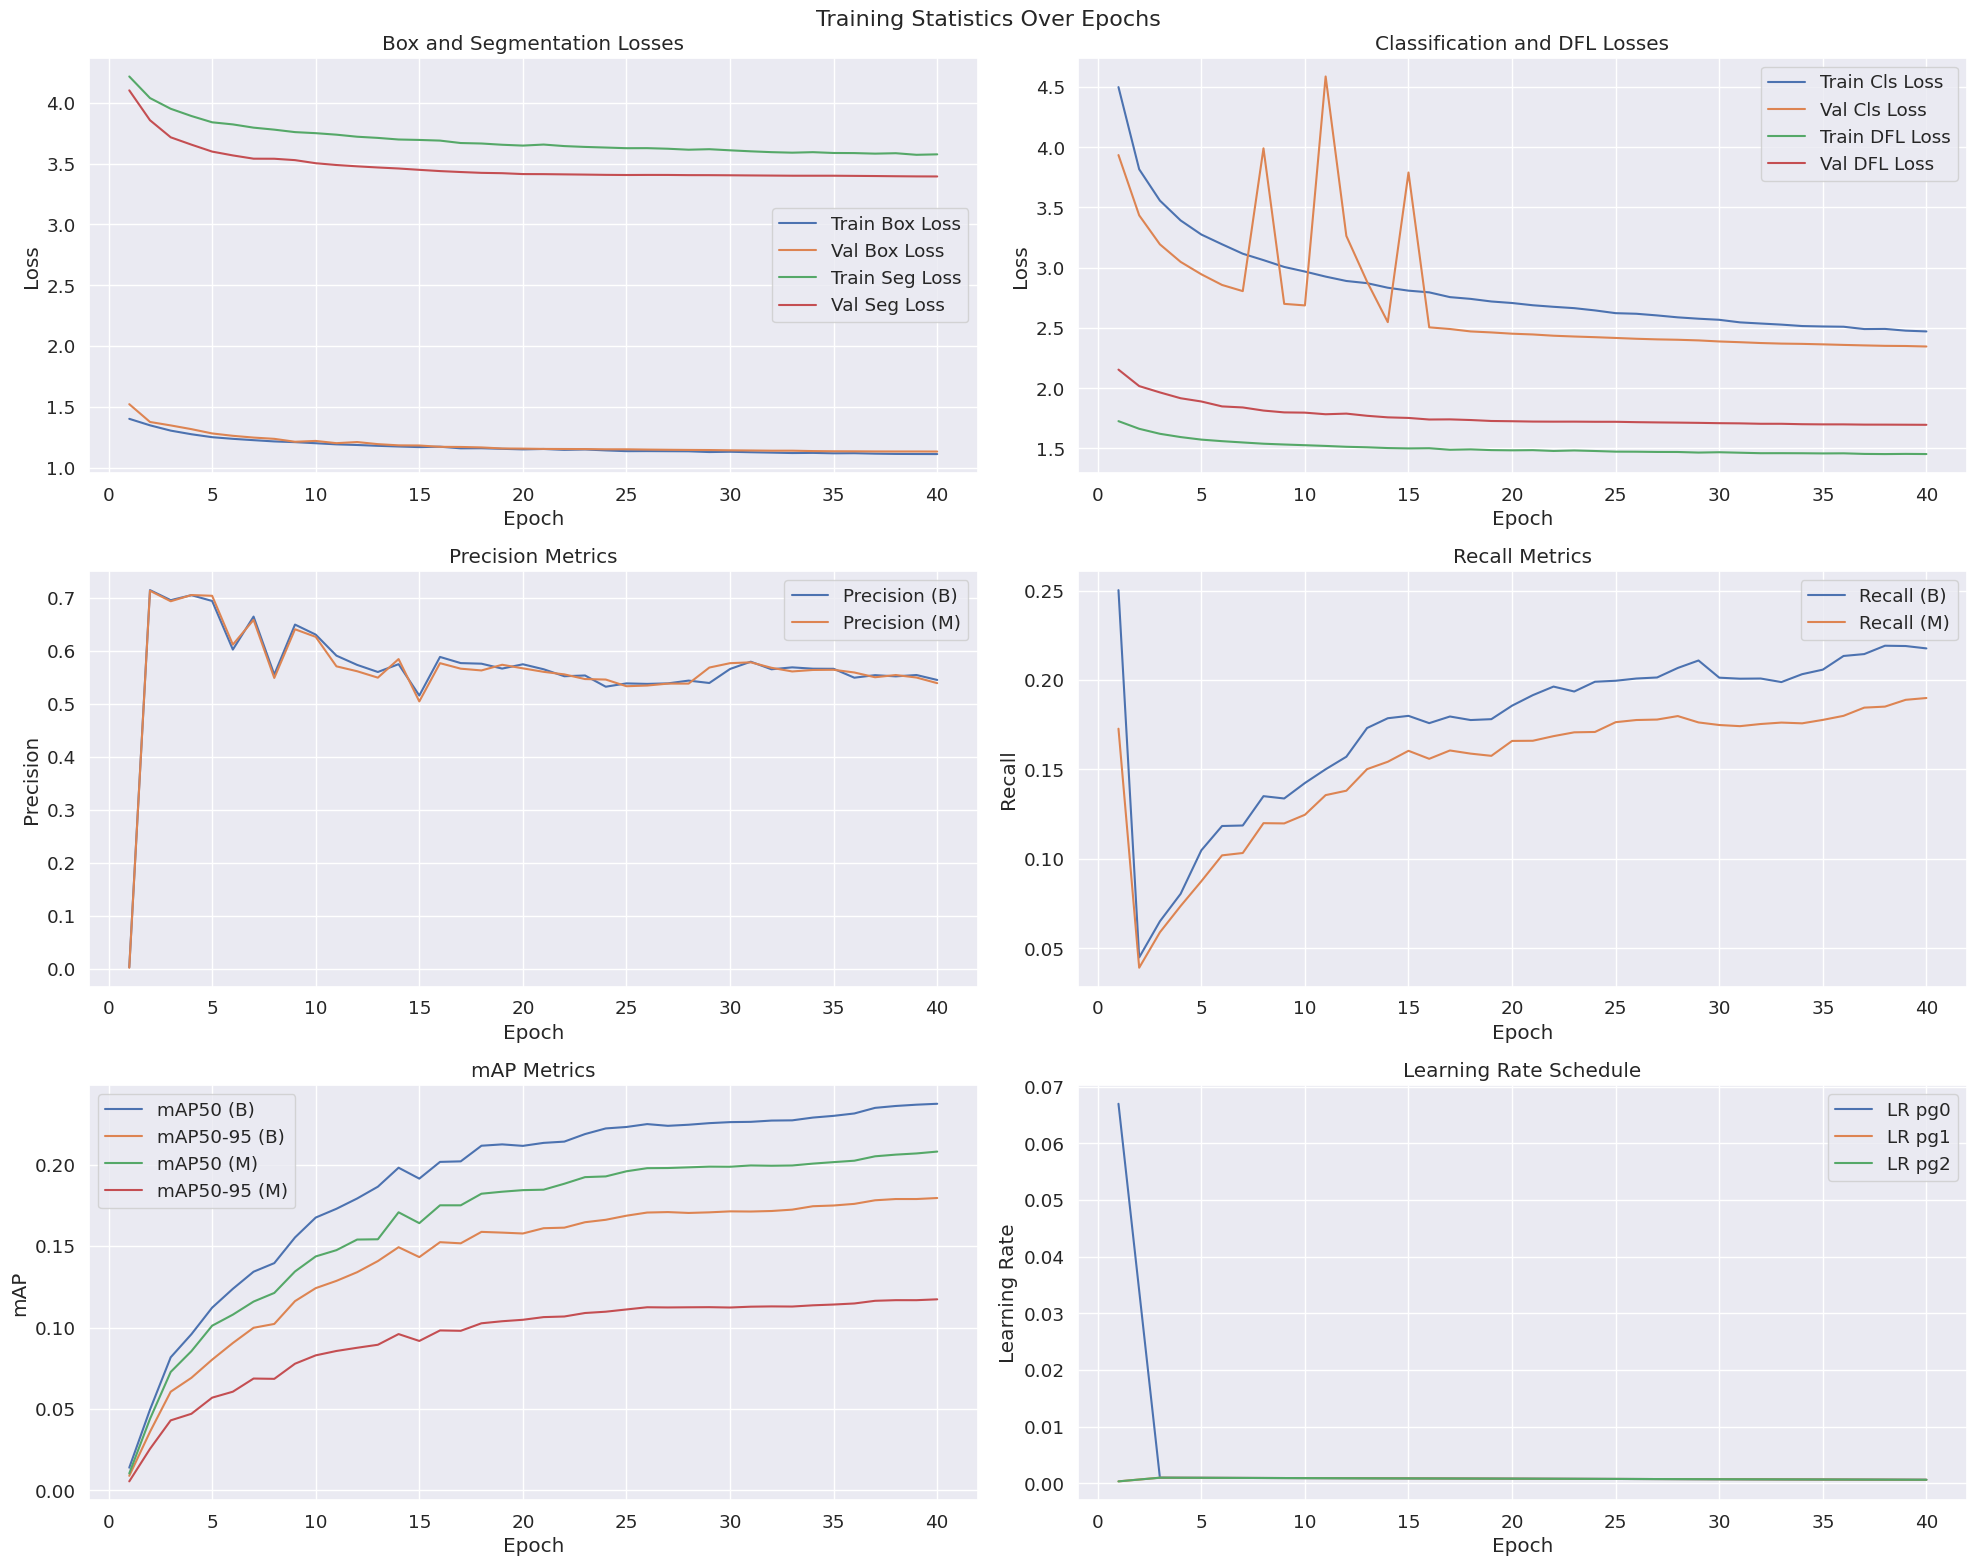

In [7]:
# Create a comprehensive dashboard of all key metrics
plt.figure(figsize=(20, 16))

# 1. Box and Segmentation Loss (Train vs Val)
plt.subplot(3, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
plt.plot(data['epoch'], data['val/box_loss'], label='Val Box Loss')
plt.plot(data['epoch'], data['train/seg_loss'], label='Train Seg Loss')
plt.plot(data['epoch'], data['val/seg_loss'], label='Val Seg Loss')
plt.title('Box and Segmentation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Classification and DFL Loss (Train vs Val)
plt.subplot(3, 2, 2)
plt.plot(data['epoch'], data['train/cls_loss'], label='Train Cls Loss')
plt.plot(data['epoch'], data['val/cls_loss'], label='Val Cls Loss')
plt.plot(data['epoch'], data['train/dfl_loss'], label='Train DFL Loss')
plt.plot(data['epoch'], data['val/dfl_loss'], label='Val DFL Loss')
plt.title('Classification and DFL Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 3. Precision (B) and (M)
plt.subplot(3, 2, 3)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision (B)')
plt.plot(data['epoch'], data['metrics/precision(M)'], label='Precision (M)')
plt.title('Precision Metrics')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# 4. Recall (B) and (M)
plt.subplot(3, 2, 4)
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall (B)')
plt.plot(data['epoch'], data['metrics/recall(M)'], label='Recall (M)')
plt.title('Recall Metrics')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

# 5. mAP for both B and M
plt.subplot(3, 2, 5)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50 (B)')
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
plt.plot(data['epoch'], data['metrics/mAP50(M)'], label='mAP50 (M)')
plt.plot(data['epoch'], data['metrics/mAP50-95(M)'], label='mAP50-95 (M)')
plt.title('mAP Metrics')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)

# 6. Learning Rates
plt.subplot(3, 2, 6)
plt.plot(data['epoch'], data['lr/pg0'], label='LR pg0')
plt.plot(data['epoch'], data['lr/pg1'], label='LR pg1')
plt.plot(data['epoch'], data['lr/pg2'], label='LR pg2')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle('Training Statistics Over Epochs', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

## Summary of Training Progress

This visualization tracks the model's training progress over 40 epochs:

1. **Losses**: Both training and validation losses show a consistent downward trend, indicating the model is learning effectively.
2. **Precision & Recall**: These metrics improved gradually, with some fluctuations.
3. **mAP Metrics**: Mean Average Precision metrics show steady improvement, with mAP50 performing better than mAP50-95.
4. **Learning Rate**: The learning rate schedule shows the expected decay pattern.

The gap between training and validation metrics is relatively small, suggesting the model is generalizing well without significant overfitting.